In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t')

In [4]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [6]:
review=df.iloc[0,0]

In [7]:
review=review.lower()

In [8]:
import re

In [9]:
review=re.findall('[a-zA-Z]+',review)

In [10]:
review

['wow', 'loved', 'this', 'place']

In [11]:
review=' '.join(review)

In [12]:
review

'wow loved this place'

In [13]:
review = re.sub('[^a-zA-Z]',' ',review)

In [14]:
review

'wow loved this place'

In [15]:
import nltk

In [16]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [17]:
from nltk.corpus import stopwords

In [18]:
sw=stopwords.words('english')

In [19]:
from nltk.stem.porter import PorterStemmer

In [20]:
ps=PorterStemmer()

In [21]:
ps.stem('loved')

'love'

In [22]:
review=review.split()

In [23]:
review=[ps.stem(i) for i in review if i not in sw]

In [24]:
review

['wow', 'love', 'place']

In [25]:
review=' '.join(review)

In [26]:
review

'wow love place'

In [27]:
new=[]
for i in range(0,1000):
    review=df.iloc[i,0]
    review=review.lower()
    review = re.sub('[^a-zA-Z]',' ',review)
    review=review.split()
    review=[ps.stem(i) for i in review if i not in sw]
    review=' '.join(review)
    new.append(review)
    

In [28]:
new

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
cv=CountVectorizer(max_features=1500)   ### there are total 1565 cols or features out of which 1500 top are considered

In [31]:
X=cv.fit_transform(new).toarray()

In [32]:
y=df['Liked'].values######converting to array as to support X

In [33]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [34]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
X.shape

(1000, 1500)

In [36]:
####### Now X and Y are in array form and is a problem of classifiation so here any ML classification algo can be applied

In [37]:
#plt.scatter(X,y)

In [38]:
X.shape

(1000, 1500)

In [39]:
y.shape

(1000,)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [49]:
from sklearn.svm import SVC

In [50]:
model=SVC()

In [55]:
model.fit(X_train,y_train)

C:\Users\ajay gadhe\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [56]:
y_pred=model.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
confusion_matrix(y_test,y_pred)

array([[147,   0],
       [153,   0]], dtype=int64)

In [59]:
###Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
model=LogisticRegression()

In [70]:
model.fit(X_train,y_train)

C:\Users\ajay gadhe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
ypred=model.predict(X_test)

In [72]:
from sklearn.metrics import confusion_matrix


In [73]:
confusion_matrix(ypred,y_test)

array([[113,  47],
       [ 26, 114]], dtype=int64)

In [43]:
#### Knn

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
err_list1=[]
for i in range(1,51):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    ypred=knn.predict(X_test)
    err_list1.append(np.mean(y_test!=ypred))

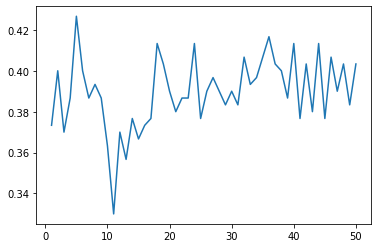

In [70]:
plt.plot(range(1,51),err_list1)

In [71]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
ypred=knn.predict(X_test)

In [72]:
from sklearn.metrics import confusion_matrix

In [73]:
confusion_matrix(y_test,ypred)

array([[111,  33],
       [ 66,  90]], dtype=int64)

111.3

In [53]:
##NB

In [56]:
###Gaussian NB
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()

In [57]:
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [59]:
ypred=classifier.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
confusion_matrix(y_test,ypred)

array([[ 70,  74],
       [ 23, 133]], dtype=int64)

In [62]:
np.mean(ypred==y_test)

0.6766666666666666

In [74]:
203/300

0.6766666666666666